# Stock Price Prediction

### Importing Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import pickle
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection

#### Symbols of all 50 companies in NIFTY50 index in NSE

In [2]:
symbols = ["RELIANCE.NS", "HDFCBANK.NS","ICICIBANK.NS","INFY.NS","HDFC.NS","TCS.NS","ITC.NS","LT.NS","KOTAKBANK.NS"
          ,"AXISBANK.NS","HINDUNILVR.NS","SBIN.NS","BHARTIARTL.NS","BAJFINANCE.NS","M&M.NS","ASIANPAINT.NS",
           "HCLTECH.NS","MARUTI.NS","SUNPHARMA.NS","TITAN.NS","TATASTEEL.NS","NTPC.NS","ULTRACEMCO.NS",
           "ADANIENT.NS","TATAMOTORS.NS","POWERGRID.NS","BAJAJFINSV.NS","INDUSINDBK.NS","HINDALCO.NS",
           "JSWSTEEL.NS","NESTLEIND.NS","TECHM.NS","GRASIM.NS","WIPRO.NS","HDFCLIFE.NS","ONGC.NS","CIPLA.NS",
           "SBILIFE.NS","DRREDDY.NS","BRITANNIA.NS","COALINDIA.NS","ADANIPORTS.NS","EICHERMOT.NS","APOLLOHOSP.NS",
           "TATACONSUM.NS","BAJAJ-AUTO.NS","DIVISLAB.NS","UPL.NS","HEROMOTOCO.NS","BPCL.NS"
          ]

#### Download the dataset from yahoo finance

In [3]:
# # Downloading last 7 years data for all 50 companies
# price_data = [yf.Ticker(symbol).history(period="7y") for symbol in symbols]

In [4]:
# companyPrice = {a:b for a,b in zip(symbols,price_data)}
# companyPrice

#### Save the companyPrice dictionary which contains the dataset as a pickle file

In [5]:
# datadict = open('datasetDict.pkl', 'wb')
# pickle.dump(companyPrice, datadict)
# datadict.close()

#### Loading the pickle file incase dataset was already downloaded

In [6]:
fl = open('datasetDict.pkl', 'rb')
companyPrice = pickle.load(fl)
fl.close()

In [7]:
# We will be using closing price for prediction
c,rel = 'Close','RELIANCE.NS'

In [8]:
# Shape of dataset of a single company
companyPrice[rel].shape

(1731, 7)

In [9]:
companyPrice[rel]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-09 00:00:00+05:30,461.928237,469.843569,460.099789,467.293335,7219470,0.0,0.0
2016-06-10 00:00:00+05:30,468.664646,473.668880,465.921944,469.963837,7530182,0.0,0.0
2016-06-13 00:00:00+05:30,466.691853,473.211759,463.395789,472.080994,4713976,0.0,0.0
2016-06-14 00:00:00+05:30,472.008846,474.150070,466.403164,469.747314,5041354,0.0,0.0
2016-06-15 00:00:00+05:30,471.551692,474.679330,468.544360,473.765106,5136069,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-05 00:00:00+05:30,2467.199951,2483.750000,2458.449951,2477.250000,5034355,0.0,0.0
2023-06-06 00:00:00+05:30,2483.449951,2487.699951,2462.000000,2479.350098,3458161,0.0,0.0
2023-06-07 00:00:00+05:30,2487.000000,2500.000000,2472.600098,2498.149902,4759238,0.0,0.0


#### Visualisation of the closing price

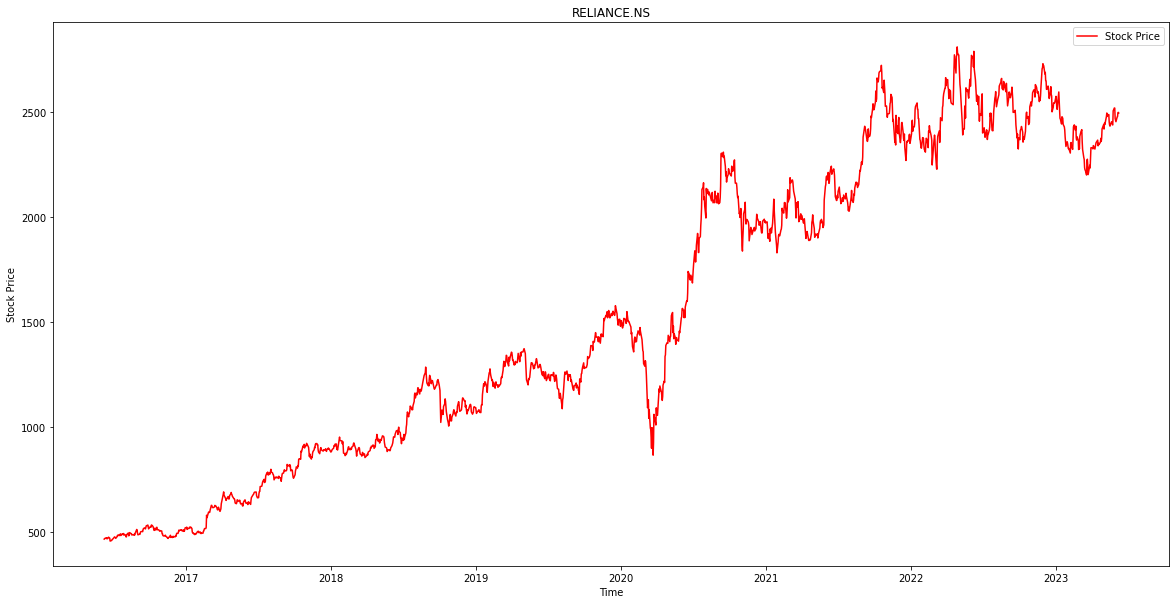

In [10]:
fig = plt.figure(figsize = (20,10))
plt.plot(companyPrice[rel][c], color = 'red', label ='Stock Price')
plt.title(rel)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

### Utilities

#### Train-test split

In [11]:
# 80% of data will be used for training and the most recent 20% prices for testing
testing_ratio,training_ratio=0.2,0.8

In [12]:
training_size,testing_size = int(training_ratio*len(companyPrice[rel])),int(testing_ratio*len(companyPrice[rel]))

Length of training data of all companies

In [13]:
training_data_len = {k:math.ceil(len(companyPrice[k][c])*0.8) for k in companyPrice}
training_data_len

{'RELIANCE.NS': 1385,
 'HDFCBANK.NS': 1385,
 'ICICIBANK.NS': 1385,
 'INFY.NS': 1385,
 'HDFC.NS': 1385,
 'TCS.NS': 1385,
 'ITC.NS': 1385,
 'LT.NS': 1385,
 'KOTAKBANK.NS': 1385,
 'AXISBANK.NS': 1385,
 'HINDUNILVR.NS': 1385,
 'SBIN.NS': 1385,
 'BHARTIARTL.NS': 1385,
 'BAJFINANCE.NS': 1385,
 'M&M.NS': 1385,
 'ASIANPAINT.NS': 1385,
 'HCLTECH.NS': 1385,
 'MARUTI.NS': 1385,
 'SUNPHARMA.NS': 1385,
 'TITAN.NS': 1385,
 'TATASTEEL.NS': 1385,
 'NTPC.NS': 1385,
 'ULTRACEMCO.NS': 1385,
 'ADANIENT.NS': 1385,
 'TATAMOTORS.NS': 1385,
 'POWERGRID.NS': 1385,
 'BAJAJFINSV.NS': 1385,
 'INDUSINDBK.NS': 1385,
 'HINDALCO.NS': 1385,
 'JSWSTEEL.NS': 1385,
 'NESTLEIND.NS': 1385,
 'TECHM.NS': 1385,
 'GRASIM.NS': 1385,
 'WIPRO.NS': 1385,
 'HDFCLIFE.NS': 1100,
 'ONGC.NS': 1385,
 'CIPLA.NS': 1385,
 'SBILIFE.NS': 1125,
 'DRREDDY.NS': 1385,
 'BRITANNIA.NS': 1385,
 'COALINDIA.NS': 1385,
 'ADANIPORTS.NS': 1385,
 'EICHERMOT.NS': 1385,
 'APOLLOHOSP.NS': 1385,
 'TATACONSUM.NS': 1385,
 'BAJAJ-AUTO.NS': 1385,
 'DIVISLAB.NS':

#### Root mean square error

In [14]:
def rmse(actual, predicted):
    err = np.sqrt(np.mean((actual-predicted)**2))
    return err

def accu(actual,predicted):
    acc = 0
    for i in range(len(predicted)) :
        acc+=(abs(actual[i]-predicted[i])/actual[i])*100
    accp = 100-acc/len(predicted)
    return accp        

In [15]:
# calculating rmse and accuracy for testing data
def calculate_rmse_accuracy(actual_prices:pd.DataFrame, predicted_prices:np.array):
    tr_size = int(training_ratio*len(actual_prices))
    error = rmse(np.array(actual_prices[tr_size:]['Close']), np.array(predicted_prices[tr_size:]))
    accuracy = accu(np.array(actual_prices[tr_size:]['Close']), np.array(predicted_prices[tr_size:]))
    return error,accuracy

#### Function to plot an overlapping graph

In [16]:
def plot_overlapping_graph(actual_price,predicted_price,k,predicted_label) :
    fig = plt.figure(figsize = (20,10))
    plt.plot(actual_price, color = 'red', label ='Actual Stock Price')
    plt.plot(predicted_price, color = 'blue', label = '50 Day '+ predicted_label)
    t = f'{k}'
    plt.title(t)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()

### Simple Moving Average (SMA)

In [17]:
# the number of days being used for calculating moving average
days = 50

In [18]:
# dict that contains moving avg for all companies
sma = dict()

In [19]:
for k in companyPrice :
    sma[k] = companyPrice[k][c].rolling(days).mean()

In [20]:
sma[rel]

Date
2016-06-09 00:00:00+05:30            NaN
2016-06-10 00:00:00+05:30            NaN
2016-06-13 00:00:00+05:30            NaN
2016-06-14 00:00:00+05:30            NaN
2016-06-15 00:00:00+05:30            NaN
                                ...     
2023-06-05 00:00:00+05:30    2393.674019
2023-06-06 00:00:00+05:30    2397.867021
2023-06-07 00:00:00+05:30    2402.298018
2023-06-08 00:00:00+05:30    2407.335015
2023-06-09 00:00:00+05:30    2413.201016
Name: Close, Length: 1731, dtype: float64

#### Calculate RMSE and accuracy for simple moving average

In [21]:
sma_error,sma_acc = {},{}
for k in symbols :
    sma_error[k],sma_acc[k] = calculate_rmse_accuracy(companyPrice[k],sma[k]) 

In [22]:
print(sma_error,end = '\n\n')
print(sma_acc)

{'RELIANCE.NS': 117.41642909552635, 'HDFCBANK.NS': 61.533692774501716, 'ICICIBANK.NS': 45.92047661341962, 'INFY.NS': 100.37544223736897, 'HDFC.NS': 121.70984737865354, 'TCS.NS': 141.20893696907305, 'ITC.NS': 20.451645479010534, 'LT.NS': 106.6317472992212, 'KOTAKBANK.NS': 78.09019470872072, 'AXISBANK.NS': 53.159182551905644, 'HINDUNILVR.NS': 119.32514709276697, 'SBIN.NS': 30.86463772257827, 'BHARTIARTL.NS': 34.19650089697599, 'BAJFINANCE.NS': 545.8155003794803, 'M&M.NS': 82.13804552526942, 'ASIANPAINT.NS': 198.81078031276613, 'HCLTECH.NS': 53.69556188085246, 'MARUTI.NS': 445.2605840359155, 'SUNPHARMA.NS': 40.81735930934468, 'TITAN.NS': 160.2940575048559, 'TATASTEEL.NS': 11.246883838634162, 'NTPC.NS': 7.90618996577014, 'ULTRACEMCO.NS': 429.4587028202896, 'ADANIENT.NS': 535.3424587088175, 'TATAMOTORS.NS': 31.662073916815668, 'POWERGRID.NS': 9.580480071848948, 'BAJAJFINSV.NS': 149.90110396886678, 'INDUSINDBK.NS': 82.66330003907308, 'HINDALCO.NS': 51.540349572532676, 'JSWSTEEL.NS': 50.78373

#### Average root mean square error values

In [23]:
avg_sma,median_sma = np.mean(np.array(list(sma_error.values()))),np.median(np.array(list(sma_error.values())))

In [24]:
# mean and median error values for all companies
print(f'mean = {avg_sma}, median = {median_sma}')

mean = 140.3256190501452, median = 80.56092503251921


#### Visualisation of Simple Moving Average

RMSE for RELIANCE.NS=117.41642909552635


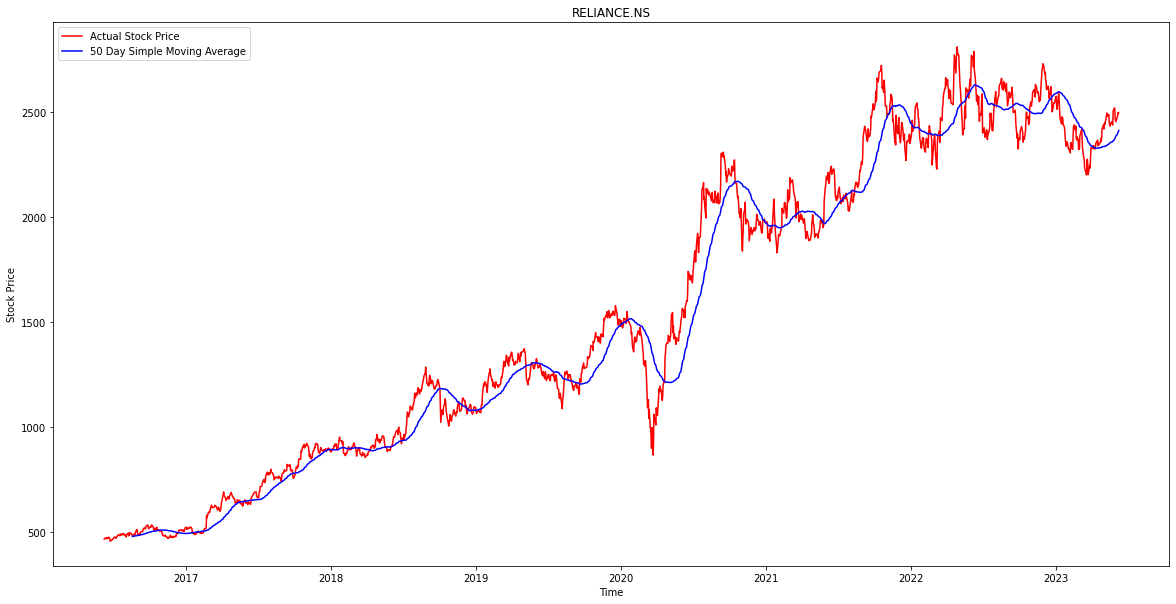

In [25]:
plot_overlapping_graph(companyPrice[rel][c],sma[rel],rel,'Simple Moving Average')
print(f'RMSE for {rel}={sma_error[rel]}')

RMSE for RELIANCE.NS=117.41642909552635


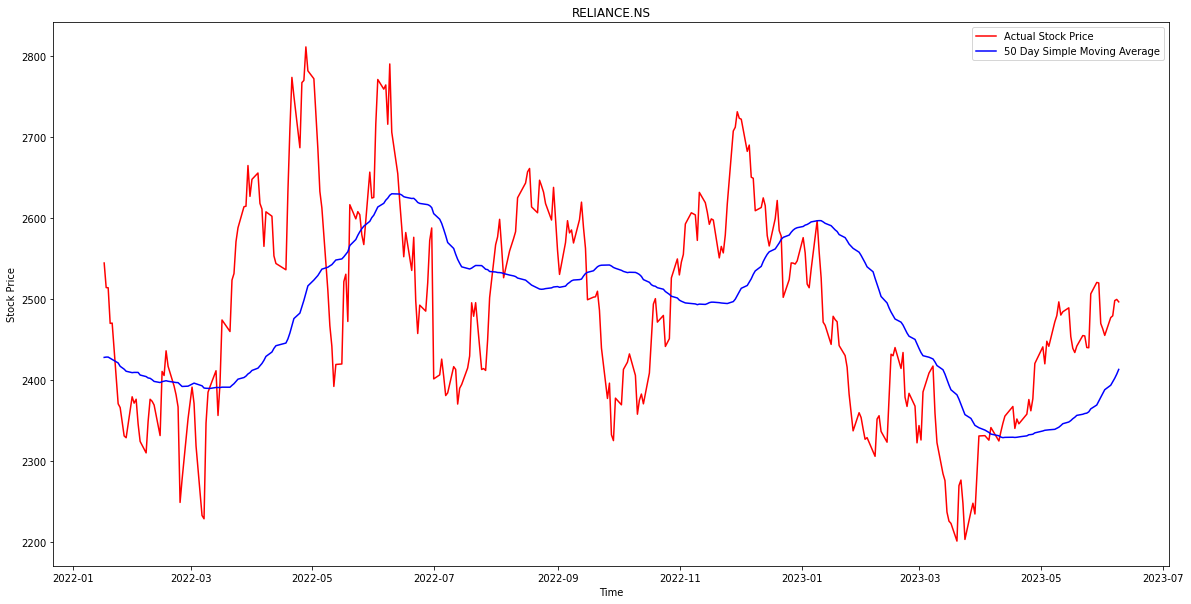

In [26]:
# visualisation of only the testing data
plot_overlapping_graph(companyPrice[rel][c][training_data_len[rel]:],sma[rel][training_data_len[rel]:],rel,'Simple Moving Average')
print(f'RMSE for {rel}={sma_error[rel]}')

### Exponential Moving Average (EMA)

In [27]:
# the number of days being used for calculating moving average
days = 50

In [28]:
#  dict that contains calculated EMA data of all companies
ema = dict()

In [29]:
for k in companyPrice :
    ema[k] = companyPrice[k][c].ewm(span=days, adjust=False).mean()

In [30]:
ema[rel]

Date
2016-06-09 00:00:00+05:30     467.293335
2016-06-10 00:00:00+05:30     467.398061
2016-06-13 00:00:00+05:30     467.581705
2016-06-14 00:00:00+05:30     467.666631
2016-06-15 00:00:00+05:30     467.905787
                                ...     
2023-06-05 00:00:00+05:30    2424.525968
2023-06-06 00:00:00+05:30    2426.675934
2023-06-07 00:00:00+05:30    2429.478835
2023-06-08 00:00:00+05:30    2432.230641
2023-06-09 00:00:00+05:30    2434.754934
Name: Close, Length: 1731, dtype: float64

#### Root Mean Square Error for EMA

In [31]:
ema_error,ema_acc = {},{}
for k in symbols :
    ema_error[k],ema_acc[k] = calculate_rmse_accuracy(companyPrice[k],ema[k]) 

In [32]:
print(ema_error,ema_acc)

{'RELIANCE.NS': 98.71159130579633, 'HDFCBANK.NS': 55.191222758586164, 'ICICIBANK.NS': 38.382848210905905, 'INFY.NS': 83.42003548597951, 'HDFC.NS': 109.54176577408347, 'TCS.NS': 119.52292852486103, 'ITC.NS': 18.719054313204282, 'LT.NS': 92.94840093657628, 'KOTAKBANK.NS': 65.58037699859163, 'AXISBANK.NS': 45.12426494166298, 'HINDUNILVR.NS': 103.74439987896542, 'SBIN.NS': 25.988863522013546, 'BHARTIARTL.NS': 28.78850639875433, 'BAJFINANCE.NS': 449.7715980202756, 'M&M.NS': 71.87801592087864, 'ASIANPAINT.NS': 157.59358943670634, 'HCLTECH.NS': 46.856984984484036, 'MARUTI.NS': 374.135950372279, 'SUNPHARMA.NS': 35.21598962323374, 'TITAN.NS': 132.51034461576407, 'TATASTEEL.NS': 9.555340836931206, 'NTPC.NS': 6.7490788106640816, 'ULTRACEMCO.NS': 361.16623464214643, 'ADANIENT.NS': 449.4500336542574, 'TATAMOTORS.NS': 26.696651104078654, 'POWERGRID.NS': 8.250345301087286, 'BAJAJFINSV.NS': 123.1240748917393, 'INDUSINDBK.NS': 68.69998843923487, 'HINDALCO.NS': 41.02417157627872, 'JSWSTEEL.NS': 39.82309

#### Average and median root mean square error

In [33]:
avg_ema,median_ema = np.mean(np.array(list(ema_error.values()))), np.median(np.array(list(ema_error.values())))

In [34]:
print(f'Mean RMSE = {avg_ema}, Median RMSE = {median_ema}')

Mean RMSE = 117.37143403375343, Median RMSE = 67.14018271891325


#### Visualisation of  calculated EMA

RMSE for RELIANCE.NS =98.71159130579633


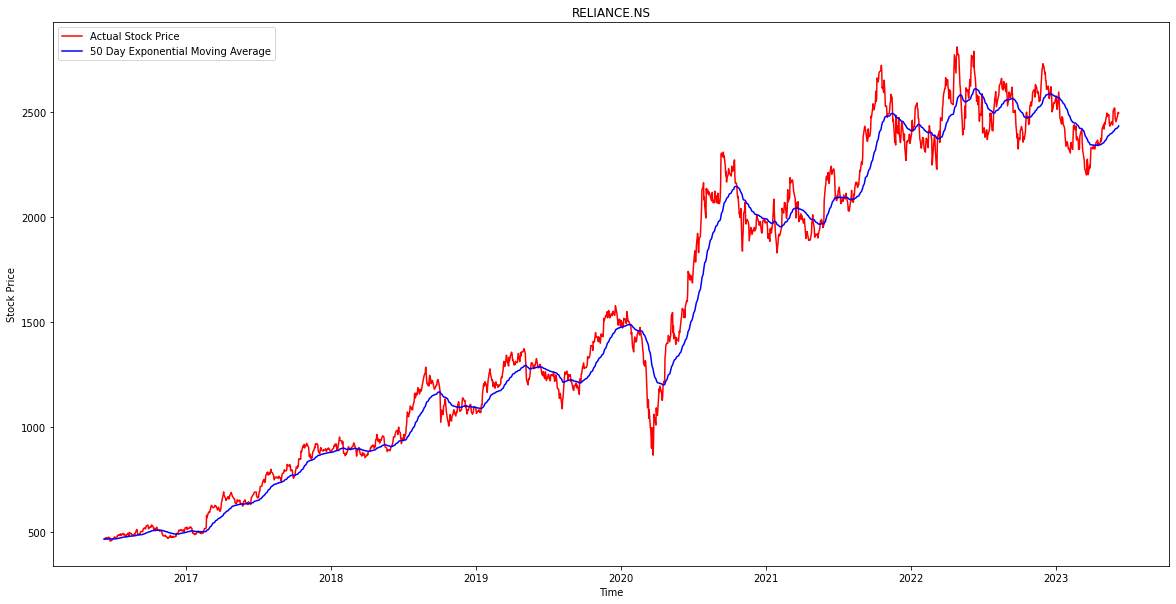

In [35]:
plot_overlapping_graph(companyPrice[rel][c],ema[rel],rel,'Exponential Moving Average')
print(f'RMSE for {rel} ={ema_error[rel]}')

RMSE for RELIANCE.NS=98.71159130579633


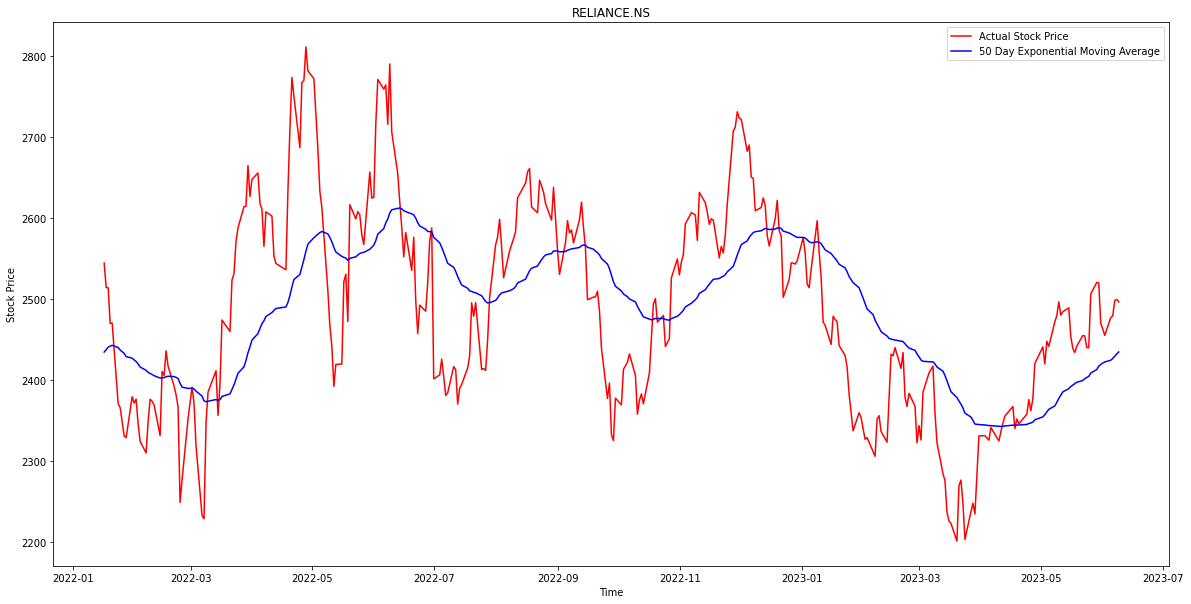

In [36]:
# visualisation of only the testing data
plot_overlapping_graph(companyPrice[rel][c][training_data_len[rel]:],ema[rel][training_data_len[rel]:],rel,'Exponential Moving Average')
print(f'RMSE for {rel}={ema_error[rel]}')

### Comparison between SMA and EMA

In [37]:
print(f'Average RMSE for SMA is {avg_sma} and for EMA is {avg_ema}')

Average RMSE for SMA is 140.3256190501452 and for EMA is 117.37143403375343


In [38]:
print(f'Median RMSE for SMA is {median_sma} and for EMA is {median_ema}')

Median RMSE for SMA is 80.56092503251921 and for EMA is 67.14018271891325


### LSTM

In [39]:
# libraries required for LSTM
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler

2023-06-10 06:25:03.542676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-10 06:25:03.875085: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-10 06:25:03.945251: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-10 06:25:03.945289: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

#### Preprocessing
Save only closing price numpy array

In [40]:
nifty_close_values = {k:companyPrice[k][c].values for k in companyPrice}
nifty_close_values[rel]

array([ 467.29333496,  469.96383667,  472.08099365, ..., 2498.14990234,
       2499.64990234, 2496.60009766])

MinMax Scaler object for all companies

In [41]:
scaler = {}
for k in symbols :
    scaler[k] = MinMaxScaler(feature_range=(0,1))

Reshaping and scaling the dataset

In [42]:
scaled_values = {}
for k in nifty_close_values :
    nifty_close_values[k] = nifty_close_values[k].reshape((-1,1))
    scaled_values[k] = scaler[k].fit_transform(nifty_close_values[k])
print(f"Scaled values for {rel}")
print(scaled_values[rel])
print(scaler[rel].inverse_transform(scaled_values[rel]))

Scaled values for RELIANCE.NS
[[0.00402759]
 [0.00516225]
 [0.0060618 ]
 ...
 [0.86691043]
 [0.86754776]
 [0.86625194]]
[[ 467.29333496]
 [ 469.96383667]
 [ 472.08099365]
 ...
 [2498.14990234]
 [2499.64990234]
 [2496.60009766]]


Creating scaled training data

In [43]:
trainData= {}
for k in symbols:
    trainData[k] = scaled_values[k][:training_data_len[k],:]

In [44]:
print(f'Length of {rel} training data')
len(trainData[rel])

Length of RELIANCE.NS training data


1385

x_train is the independent feature and y_train is the dependent

In [45]:
x_train,y_train=defaultdict(list),defaultdict(list)

days denotes the lookback value and x_train contains vector of 50 prices and corresponding y_train values contains price of 51st day

In [46]:
days = 50
for k in companyPrice :
    for i in range(days,len(trainData[k])) :
        x_train[k].append(trainData[k][i-days:i,0])
        y_train[k].append(trainData[k][i,0])

In [47]:
# convert to numpy array
for k in symbols :
    x_train[k],y_train[k]=np.array(x_train[k]),np.array(y_train[k])

Reshape train dataset because lstm model expects 3D data

In [48]:
for k in symbols :
    x_train[k] = np.reshape(x_train[k],(x_train[k].shape[0],x_train[k].shape[1],1))

In [49]:
x_train[rel].shape

(1335, 50, 1)

#### Model Creation

Create models for all 50 companies in the index

In [50]:
models = {}
# for k in symbols :
#     models[k] = Sequential()
#     models[k].add(LSTM(50,activation='relu',return_sequences=True,input_shape=(days,1)))
#     models[k].add(LSTM(50,return_sequences=False))
#     models[k].add(Dense(25))
#     models[k].add(Dense(1))
#     models[k].compile(optimizer='adam', loss='mean_squared_error')
# plot_model(models[k], show_shapes=True, show_layer_names=True)

#### Model Training

In [51]:
# history = models[rel].fit(x_train[rel],y_train[rel],batch_size=1,epochs=10, verbose=1)

Plot of loss values

In [52]:
# epochs = range(1,10+1)
# train_loss = history.history['loss']
# fig = plt.figure(figsize = (10,5))
# plt.plot(epochs, train_loss, 'b', label='Training Loss')
# plt.title(f'Epoch-Error Graph for {rel}')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

Training the models and saving them

In [53]:
# for k in symbols:
#     filename = f"models/{k}.pkl"
#     if not os.path.isfile(filename):
#         models[k].fit(x_train[k],y_train[k],batch_size=1,epochs=10, verbose=1)
#         mo = open(f'models/{k}.pkl', 'wb')
#         pickle.dump(models[k], mo)
#         mo.close()

Opening the saved models

In [54]:
for k in symbols :
    fl = open(f'models/{k}.pkl', 'rb')
    models[k] = pickle.load(fl)
    fl.close()

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-06-10 01:09:12         3067
metadata.json                                  2023-06-10 01:09:12           64
variables.h5                                   2023-06-10 01:09:12       413824


2023-06-10 06:25:06.838977: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-10 06:25:06.839272: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-10 06:25:06.839295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shashank-IdeaPad): /proc/driver/nvidia/version does not exist
2023-06-10 06:25:06.840153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-06-09 14:03:46         3067
metadata.json                                  2023-06-09 14:03:46     

File Name                                             Modified             Size
config.json                                    2023-06-09 14:23:56         3072
metadata.json                                  2023-06-09 14:23:56           64
variables.h5                                   2023-06-09 14:23:56       413824
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
...

File Name                                             Modified             Size
config.json                                    2023-06-09 14:48:08         3073
metadata.json                                  2023-06-09 14:48:08           64
variables.h5                                   2023-06-09 14:48:08       413824
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
...

File Name                                             Modified             Size
config.json                                    2023-06-09 15:22:32         3073
metadata.json                                  2023-06-09 15:22:32           64
variables.h5                                   2023-06-09 15:22:32       413824
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
...

File Name                                             Modified             Size
config.json                                    2023-06-09 15:45:40         3073
metadata.json                                  2023-06-09 15:45:40           64
variables.h5                                   2023-06-09 15:45:40       413824
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
...

File Name                                             Modified             Size
config.json                                    2023-06-09 16:58:14         3073
metadata.json                                  2023-06-09 16:58:14           64
variables.h5                                   2023-06-09 16:58:14       413824
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
...

File Name                                             Modified             Size
config.json                                    2023-06-09 17:25:42         3073
metadata.json                                  2023-06-09 17:25:42           64
variables.h5                                   2023-06-09 17:25:42       413824
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
...

#### Model Testing

In [55]:
# Creating the 3D dataset similar to training for testing
testData = {}
x_test,y_test = {},{}
for k in symbols :
    testData[k] = scaled_values[k][training_data_len[k]-days:,:]
    y_test[k] = nifty_close_values[k][training_data_len[k]:,:]
    x_test[k] = []
    for i in range(days,len(testData[k])) :
        x_test[k].append(testData[k][i-days:i,0])
    x_test[k] = np.array(x_test[k])

In [56]:
#reshaping test data
for k in symbols :
    x_test[k] = np.reshape(x_test[k],(x_test[k].shape[0],x_test[k].shape[1],1))

In [57]:
predictions = {}
for k in symbols :
    predictions[k] = models[k].predict(x_test[k])
    predictions[k] = scaler[k].inverse_transform(predictions[k])

11/11 [==============================] - 0s 10ms/step


In [58]:
y_test[rel]

array([[2544.58886719],
       [2514.23046875],
       [2514.03100586],
       [2470.01342773],
       [2470.41235352],
       [2370.76220703],
       [2366.1262207 ],
       [2331.08178711],
       [2328.83862305],
       [2379.4362793 ],
       [2371.55981445],
       [2376.39526367],
       [2345.68774414],
       [2324.30224609],
       [2310.14477539],
       [2348.97802734],
       [2376.34545898],
       [2373.90283203],
       [2369.26660156],
       [2331.53051758],
       [2410.69189453],
       [2405.70703125],
       [2436.1652832 ],
       [2417.12255859],
       [2392.69604492],
       [2381.82885742],
       [2366.92382812],
       [2248.97900391],
       [2277.09423828],
       [2352.4675293 ],
       [2391.3503418 ],
       [2371.16113281],
       [2318.56958008],
       [2232.82763672],
       [2228.78979492],
       [2347.03393555],
       [2385.0690918 ],
       [2391.94848633],
       [2411.58935547],
       [2356.35571289],
       [2396.13598633],
       [2474.250

In [59]:
predictions[rel]

array([[2496.9868],
       [2515.5776],
       [2467.9868],
       [2486.4343],
       [2422.2942],
       [2443.8694],
       [2308.7515],
       [2350.019 ],
       [2291.6294],
       [2301.98  ],
       [2364.9028],
       [2332.4019],
       [2352.7744],
       [2313.5542],
       [2299.4136],
       [2286.769 ],
       [2335.266 ],
       [2350.652 ],
       [2341.759 ],
       [2343.0015],
       [2297.259 ],
       [2410.1309],
       [2363.1248],
       [2414.935 ],
       [2379.868 ],
       [2359.6375],
       [2355.4836],
       [2334.8508],
       [2193.057 ],
       [2275.2974],
       [2338.3398],
       [2357.2415],
       [2332.7976],
       [2284.1147],
       [2197.642 ],
       [2217.7156],
       [2349.7708],
       [2347.4814],
       [2359.1692],
       [2390.963 ],
       [2312.8516],
       [2389.6262],
       [2459.8213],
       [2409.5037],
       [2513.5913],
       [2489.473 ],
       [2545.7615],
       [2551.648 ],
       [2580.9185],
       [2572.3057],


In [60]:
for k in symbols :
    predictions[k] = predictions[k].reshape((-1))
    y_test[k] = y_test[k].reshape((-1))
predictions[rel]

array([2496.9868, 2515.5776, 2467.9868, 2486.4343, 2422.2942, 2443.8694,
       2308.7515, 2350.019 , 2291.6294, 2301.98  , 2364.9028, 2332.4019,
       2352.7744, 2313.5542, 2299.4136, 2286.769 , 2335.266 , 2350.652 ,
       2341.759 , 2343.0015, 2297.259 , 2410.1309, 2363.1248, 2414.935 ,
       2379.868 , 2359.6375, 2355.4836, 2334.8508, 2193.057 , 2275.2974,
       2338.3398, 2357.2415, 2332.7976, 2284.1147, 2197.642 , 2217.7156,
       2349.7708, 2347.4814, 2359.1692, 2390.963 , 2312.8516, 2389.6262,
       2459.8213, 2409.5037, 2513.5913, 2489.473 , 2545.7615, 2551.648 ,
       2580.9185, 2572.3057, 2641.613 , 2562.3298, 2623.7603, 2611.5571,
       2560.624 , 2578.3694, 2509.3987, 2591.323 , 2550.6877, 2500.5088,
       2517.341 , 2498.2434, 2628.3032, 2676.849 , 2739.77  , 2692.2903,
       2634.2605, 2771.6714, 2701.366 , 2782.7683, 2714.177 , 2728.7234,
       2609.7441, 2589.1196, 2571.43  , 2434.98  , 2437.0242, 2404.429 ,
       2346.81  , 2406.2314, 2386.1643, 2521.5774, 

#### Model Evaluation

In [61]:
lstm_acc,lstm_rmse = {},{}

In [62]:
# for calculating accuracy in lstm
for k in symbols :
    acc = 0
    if len(predictions[k]) != len(y_test[k]) :
        print(k)
    for i in range(len(predictions[k])) :
        acc+=(abs(y_test[k][i]-predictions[k][i])/y_test[k][i])*100
    accp = 100-acc/len(predictions[k])
    lstm_acc[k] = accp

In [63]:
# for calculating RMSE
for k in symbols :
    act,pre = [],[]
    for i in range(len(predictions[k])) :
        act.append(y_test[k][i])
        pre.append(predictions[k][i])
    lstm_rmse[k] = rmse(np.array(act),np.array(pre))

In [64]:
avg_lstm,median_lstm = np.mean(list(lstm_rmse.values())),np.median(list(lstm_rmse.values()))
print(f"Average RMSE for lstm = {avg_lstm}")
print(f"Median RMSE for lstm = {median_lstm}")

Average RMSE for lstm = 58.062322070154494
Median RMSE for lstm = 32.79851883180621


#### Visualisation of Predicted Data for 1 example company

In [65]:
dates = companyPrice[rel].index.to_list()
dates = dates[-len(predictions[rel]):]

In [66]:
prediction_df = pd.DataFrame({'Date':dates,'Close':predictions[rel]})

In [67]:
prediction_df.set_index('Date',inplace=True)

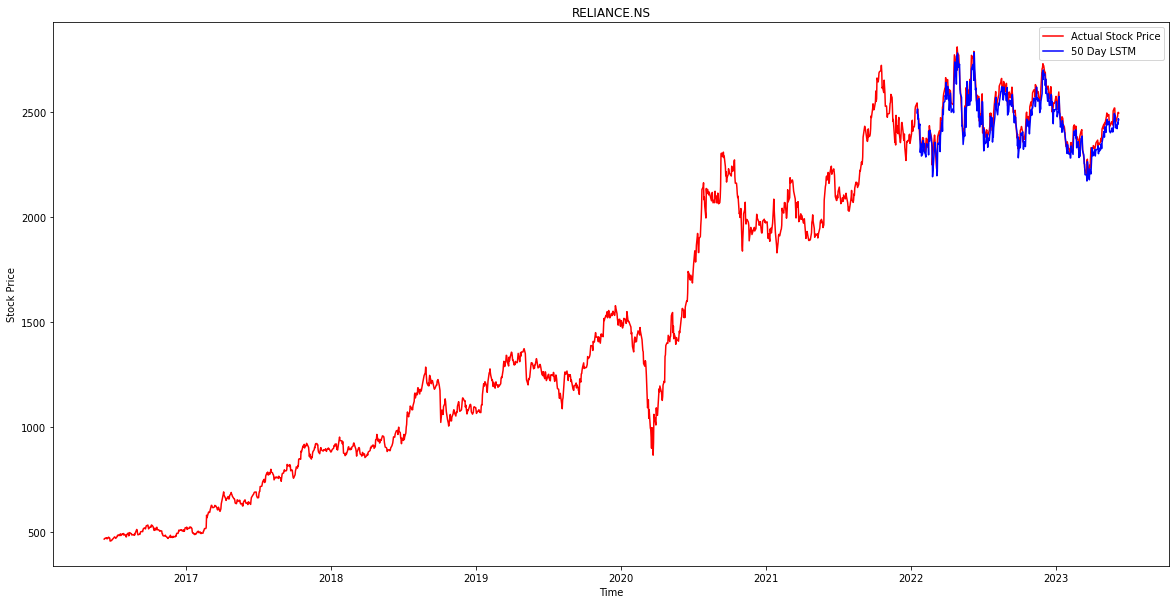

In [68]:
plot_overlapping_graph(companyPrice[rel][c],prediction_df,rel,'LSTM')

#### Visualising only the predicted part

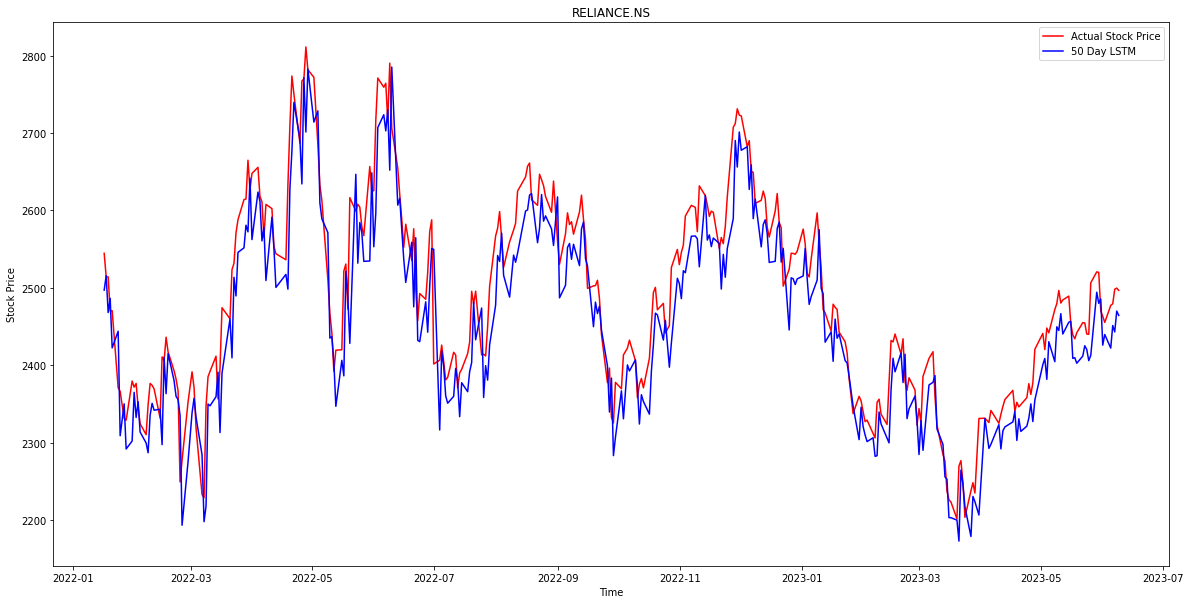

In [69]:
plot_overlapping_graph(companyPrice[rel][c][-len(predictions[rel])::],prediction_df,rel,'LSTM')

### Comparison of LSTM and Moving Averages

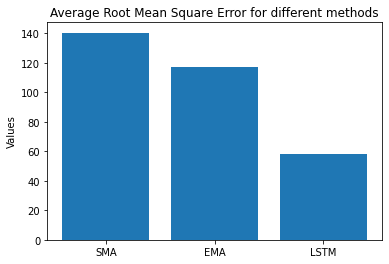

In [70]:
x_values = ['SMA', 'EMA', 'LSTM']
y_values = [avg_sma,avg_ema,avg_lstm]
plt.bar(x_values, y_values)
plt.ylabel('Values')
plt.title('Average Root Mean Square Error for different methods')
plt.show()

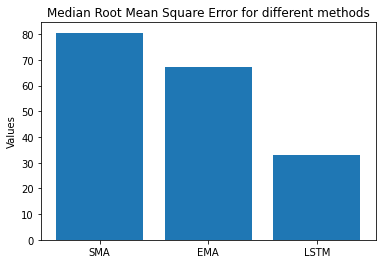

In [71]:
x_values = ['SMA', 'EMA', 'LSTM']
y_values = [median_sma,median_ema,median_lstm]
plt.bar(x_values, y_values)
plt.ylabel('Values')
plt.title('Median Root Mean Square Error for different methods')
plt.show()

In [72]:
lstm_rmse

{'RELIANCE.NS': 51.513899493816766,
 'HDFCBANK.NS': 22.63707808095157,
 'ICICIBANK.NS': 11.451684247410348,
 'INFY.NS': 53.95318247981761,
 'HDFC.NS': 46.71624815877197,
 'TCS.NS': 53.855267859671606,
 'ITC.NS': 12.912906915147046,
 'LT.NS': 37.85087395494688,
 'KOTAKBANK.NS': 35.645582505051216,
 'AXISBANK.NS': 19.658481895064284,
 'HINDUNILVR.NS': 81.76492472983767,
 'SBIN.NS': 12.664809479945832,
 'BHARTIARTL.NS': 20.45021025562569,
 'BAJFINANCE.NS': 236.69832165294247,
 'M&M.NS': 56.50531839109033,
 'ASIANPAINT.NS': 77.71465404495275,
 'HCLTECH.NS': 52.381134465079874,
 'MARUTI.NS': 138.29687507637252,
 'SUNPHARMA.NS': 27.800972421008286,
 'TITAN.NS': 70.7169524037283,
 'TATASTEEL.NS': 3.615043540943296,
 'NTPC.NS': 6.2443343177152455,
 'ULTRACEMCO.NS': 120.81919623358671,
 'ADANIENT.NS': 315.8598857234384,
 'TATAMOTORS.NS': 16.871760815044926,
 'POWERGRID.NS': 4.442138180405574,
 'BAJAJFINSV.NS': 32.8543992691034,
 'INDUSINDBK.NS': 32.74263839450902,
 'HINDALCO.NS': 12.31425585948